In [516]:
import numpy as np
import networkx as nx
from matplotlib import pyplot as plt
import random
from tqdm import tqdm
from collections import Counter, defaultdict

In [517]:
def error_message(m, e):
    
    # m is the message, e is the probability of error
    
    r = random.random()
    
    if not r > e:
        m_out = random.choice(P[m,:].nonzero()[0])
    else:
        m_out = m
    
    return m_out

In [518]:
def change_m(m1, m2, gamma):
    
    r = random.random()
    
    if not r > gamma:
        m_poss = P[m1,:].nonzero()[0]
        
        if m2 in m_poss:
            m_out = m1
            
        else:
            m_out = m1
        
    else:
        m_out = m2
    
    return m_out

In [519]:
G = nx.barabasi_albert_graph(1000, 2)

In [520]:
G = nx.erdos_renyi_graph(1000, 0.1)

In [521]:
P = np.array([[0, 1, 1, 0],
             [1, 0, 0, 1],
             [1, 0, 0, 1],
             [0, 1, 1, 0]])

In [522]:
num_seeds = 1
all0 = True
beta = 0.15 # probability of spread
e = 0.1 # error

In [523]:
for n in G.nodes:
    G.nodes[n]['M'] = -1

In [524]:
for _ in range(num_seeds):
    
    node = random.randint(0, len(G.nodes) - 1)
    
    if all0:
        G.nodes[node]['M'] = 0
    else:
        m = random.randint(0, P.shape[0]-1)
        G.nodes[node]['M'] = m
        print(m)

In [525]:
counts = {x: list() for x in range(-1, P.shape[0])}

T = 50

for t in tqdm(range(T)):
    
    valid_nodes = [node for node, data in G.nodes(data=True) if data['M'] != -1] # time step updates
    
    while len(valid_nodes) > 0:
    
        n = random.choice(valid_nodes)
        valid_nodes.remove(n)

        n_state = G.nodes[n]['M']


        neighbors = list(G.neighbors(n))

        for ni in neighbors:

            if not random.random() > beta:

                ni_state = G.nodes[ni]['M']

                if ni_state < 0:
                    G.nodes[ni]['M'] = error_message(n_state, e)
                
                else:
                    pass
            
            else:
                pass
            
            
    cts = Counter([data['M'] for node, data in G.nodes(data=True)])
    
    for x in counts.keys(): 
        counts[x].append(cts[x])
                
    


100%|██████████| 50/50 [00:02<00:00, 23.14it/s]


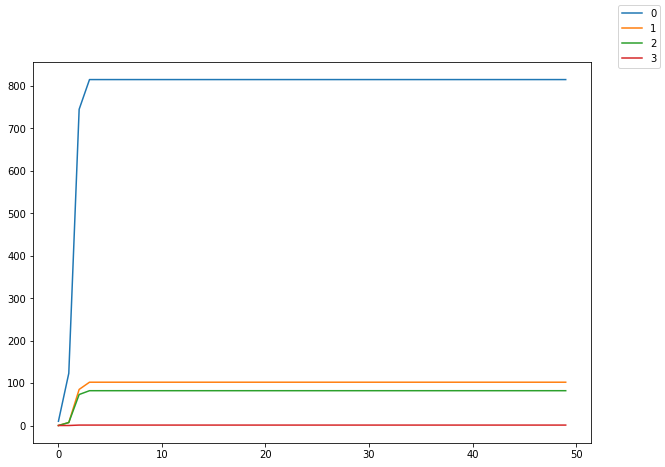

In [526]:
fig, axs = plt.subplots(figsize=(10,7))
for x in [c for c in counts.keys() if c >=0 ]:
    axs.plot(range(T), counts[x], label=x)
    
fig.legend()

In [527]:
# with behavior change mechanisms

In [528]:
#G = nx.barabasi_albert_graph(1000, 2)
G = nx.erdos_renyi_graph(1000, 0.1)

for n in G.nodes:
    G.nodes[n]['M'] = -1

P = np.array([[0, 1, 1, 0],
             [1, 0, 0, 1],
             [1, 0, 0, 1],
             [0, 1, 1, 0]])

num_seeds = 1
all0 = True
beta = 0.15 # probability of spread
e = 0.1 # error

for _ in range(num_seeds):
    node = random.randint(0, len(G.nodes) - 1)
    
    if all0:
        G.nodes[node]['M'] = 0
    else:
        m = random.randint(0, P.shape[0]-1)
        G.nodes[node]['M'] = m
        print(m)

In [529]:
gamma = 0.1
# With changing beliefs

counts = {x: list() for x in range(-1, P.shape[0])}

T = 50

for t in tqdm(range(T)):
    
    valid_nodes = [node for node, data in G.nodes(data=True) if data['M'] != -1] # time step updates
    
    while len(valid_nodes) > 0:
    
        n = random.choice(valid_nodes)
        valid_nodes.remove(n)

        n_state = G.nodes[n]['M']


        neighbors = list(G.neighbors(n))

        for ni in neighbors:

            if not random.random() > beta:

                ni_state = G.nodes[ni]['M']

                if ni_state < 0:
                    G.nodes[ni]['M'] = error_message(n_state, e)
                
                else:
                    G.nodes[ni]['M'] = change_m(n_state, ni_state, gamma)
                    
            
            else:
                pass
            
            
    cts = Counter([data['M'] for node, data in G.nodes(data=True)])
    
    for x in counts.keys(): 
        counts[x].append(cts[x])
                
    


100%|██████████| 50/50 [00:03<00:00, 13.89it/s]


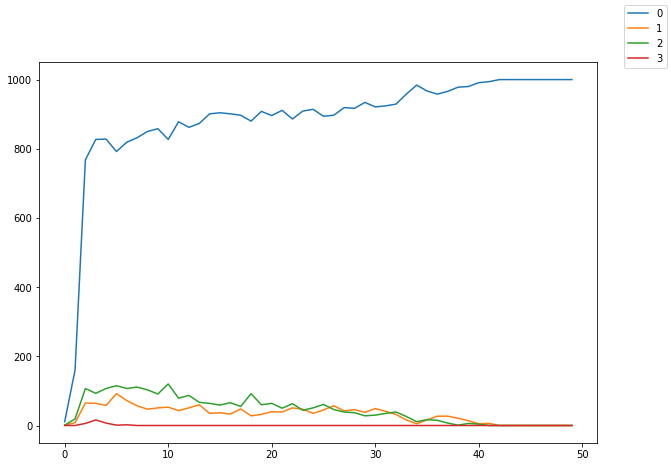

In [530]:
fig, axs = plt.subplots(figsize=(10,7))
for x in [c for c in counts.keys() if c >=0 ]:
    axs.plot(range(T), counts[x], label=x)
    
fig.legend()

# Testing

## SI MODEL

In [435]:
def si_sim(G, e, beta, T=50, num_seeds=1, all0=True, pbar_on=True):
    
    for n in G.nodes:
        G.nodes[n]['M'] = -1
        
    for _ in range(num_seeds):
    
        node = random.randint(0, len(G.nodes) - 1)

        if all0:
            G.nodes[node]['M'] = 0
        else:
            m = random.randint(0, P.shape[0]-1)
            G.nodes[node]['M'] = m
            print(m)
            
    counts = {x: list() for x in range(-1, P.shape[0])}
    
    if pbar_on:
        pbar = tqdm(range(T))
    else:
        pbar = range(T)
    

    for t in pbar:

        valid_nodes = [node for node, data in G.nodes(data=True) if data['M'] != -1] # time step updates

        while len(valid_nodes) > 0:

            n = random.choice(valid_nodes)
            valid_nodes.remove(n)

            n_state = G.nodes[n]['M']


            neighbors = list(G.neighbors(n))

            for ni in neighbors:

                if not random.random() > beta:

                    ni_state = G.nodes[ni]['M']

                    if ni_state < 0:
                        G.nodes[ni]['M'] = error_message(n_state, e)

                    else:
                        pass

                else:
                    pass


        cts = Counter([data['M'] for node, data in G.nodes(data=True)])

        for x in counts.keys(): 
            counts[x].append(cts[x])
                
    return counts

In [436]:
A = nx.erdos_renyi_graph(1000, 0.1)
Asim = si_sim(A, 0.05, 0.15)


100%|██████████| 50/50 [00:02<00:00, 23.48it/s]


In [437]:
B = nx.barabasi_albert_graph(1000, 2)
Bsim = si_sim(B, 0.05, 0.15)


100%|██████████| 50/50 [00:00<00:00, 144.26it/s]


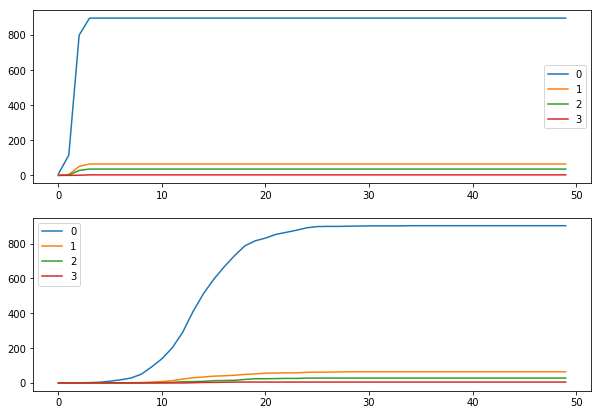

In [532]:
fig, axs = plt.subplots(2, figsize=(10,7))

for x in [c for c in Asim.keys() if c >=0 ]:
    axs[0].plot(range(T), Asim[x], label=x)

for x in [c for c in Bsim.keys() if c >=0 ]:
    axs[1].plot(range(T), Bsim[x], label=x)

axs[0].legend()
axs[1].legend()

In [ ]:
# Perhaps we can consider max size as a function of e



## SII MODEL

In [449]:
def sii_sim(G, e, beta, gamma, T=50, num_seeds=1, all0=True, pbar_on=True):
    
    for n in G.nodes:
        G.nodes[n]['M'] = -1
        
    for _ in range(num_seeds):
    
        node = random.randint(0, len(G.nodes) - 1)

        if all0:
            G.nodes[node]['M'] = 0
        else:
            m = random.randint(0, P.shape[0]-1)
            G.nodes[node]['M'] = m
            print(m)
            
    counts = {x: list() for x in range(-1, P.shape[0])}
    
    if pbar_on:
        pbar = tqdm(range(T))
    else:
        pbar = range(T)

    for t in pbar:

        valid_nodes = [node for node, data in G.nodes(data=True) if data['M'] != -1] # time step updates

        while len(valid_nodes) > 0:

            n = random.choice(valid_nodes)
            valid_nodes.remove(n)

            n_state = G.nodes[n]['M']


            neighbors = list(G.neighbors(n))

            for ni in neighbors:

                if not random.random() > beta:

                    ni_state = G.nodes[ni]['M']

                    if ni_state < 0:
                        G.nodes[ni]['M'] = error_message(n_state, e)

                    else:
                        G.nodes[ni]['M'] = change_m(n_state, ni_state, gamma)


                else:
                    pass


        cts = Counter([data['M'] for node, data in G.nodes(data=True)])

        for x in counts.keys(): 
            counts[x].append(cts[x])
            
    return counts

In [450]:
A = nx.erdos_renyi_graph(1000, 0.1)
Asiim = sii_sim(A, 0.05, 0.15, 0.01)


100%|██████████| 50/50 [00:02<00:00, 17.58it/s]


In [451]:
B = nx.barabasi_albert_graph(1000, 2)
Bsiim = sii_sim(B, 0.05, 0.15, 0.01)


100%|██████████| 50/50 [00:00<00:00, 122.30it/s]


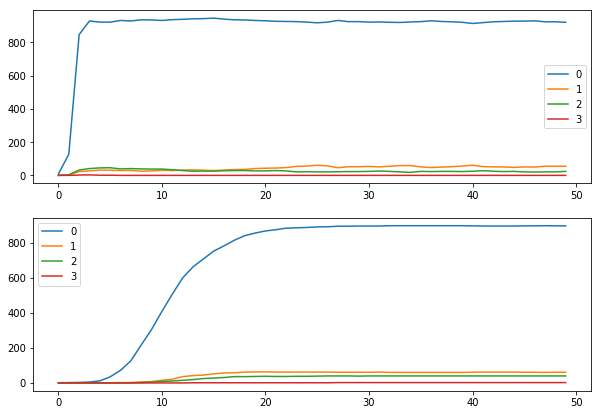

In [452]:
fig, axs = plt.subplots(2, figsize=(10,7))

for x in [c for c in Asiim.keys() if c >=0 ]:
    axs[0].plot(range(T), Asiim[x], label=x)

for x in [c for c in Bsiim.keys() if c >=0 ]:
    axs[1].plot(range(T), Bsiim[x], label=x)

axs[0].legend()
axs[1].legend()

## DIFFERENT P

In [508]:
tstP = nx.erdos_renyi_graph(6, 0.5)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


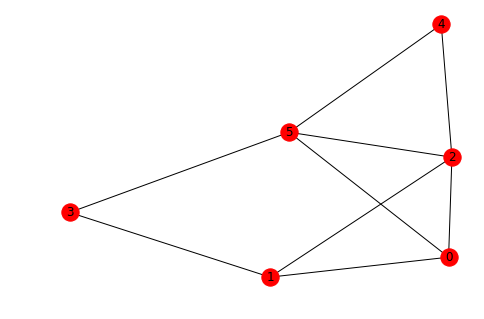

In [509]:
nx.draw(tstP, with_labels=True)

In [510]:
P = np.array(nx.adjacency_matrix(tstP).todense())

In [511]:
P

array([[0, 1, 1, 0, 0, 1],
       [1, 0, 1, 1, 0, 0],
       [1, 1, 0, 0, 1, 1],
       [0, 1, 0, 0, 0, 1],
       [0, 0, 1, 0, 0, 1],
       [1, 0, 1, 1, 1, 0]], dtype=int64)

In [512]:
PA = si_sim(A, 0.05, 0.15)
PB = si_sim(B, 0.05, 0.15)


100%|██████████| 50/50 [00:01<00:00, 25.12it/s]

100%|██████████| 50/50 [00:00<00:00, 141.26it/s]


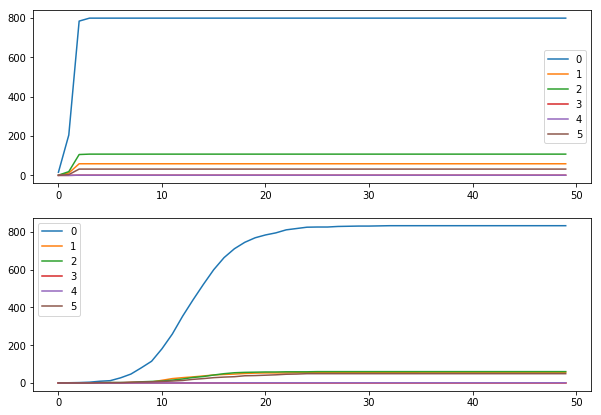

In [513]:
fig, axs = plt.subplots(2, figsize=(10,7))

for x in [c for c in PA.keys() if c >=0 ]:
    axs[0].plot(range(T), PA[x], label=x)

for x in [c for c in PA.keys() if c >=0 ]:
    axs[1].plot(range(T), PB[x], label=x)

axs[0].legend()
axs[1].legend()

In [514]:
PA2 = sii_sim(A, 0.05, 0.15, 0.01)
PB2 = sii_sim(B, 0.05, 0.15, 0.01)


100%|██████████| 50/50 [00:02<00:00, 17.34it/s]

100%|██████████| 50/50 [00:00<00:00, 121.04it/s]


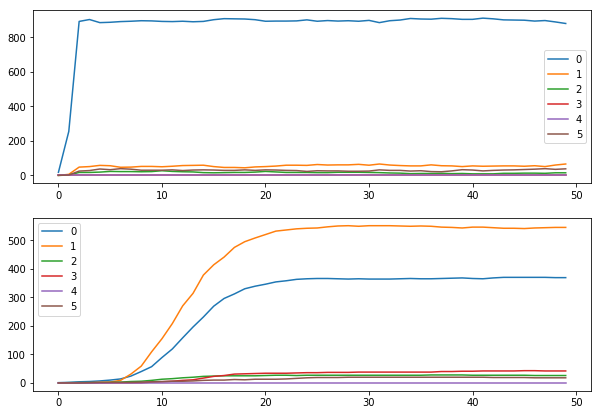

In [515]:
fig, axs = plt.subplots(2, figsize=(10,7))

for x in [c for c in PA2.keys() if c >=0 ]:
    axs[0].plot(range(T), PA2[x], label=x)

for x in [c for c in PB2.keys() if c >=0 ]:
    axs[1].plot(range(T), PB2[x], label=x)

axs[0].legend()
axs[1].legend()

In [ ]:
# Clear difference between these two. Wondering what measures besides perhaps channel capacity we can look at.
# Is there something I can sweep thru??